In [1]:
#importing all the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
import seaborn as sns

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import lightgbm as lgb
import xgboost as xgb


from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('train_aWnotuB.csv')
test = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')
#df is for train dataset
#test is for test dataset
df.head()

,DateTime,Junction,Vehicles,ID
0,01-11-2015,1,15,20151101001
1,01-11-2015,1,13,20151101011
2,01-11-2015,1,10,20151101021
3,01-11-2015,1,7,20151101031
4,01-11-2015,1,9,20151101041


In [3]:
df.tail()

,DateTime,Junction,Vehicles,ID
48115,30-06-2017,4,11,20170630194
48116,30-06-2017,4,30,20170630204
48117,30-06-2017,4,16,20170630214
48118,30-06-2017,4,22,20170630224
48119,30-06-2017,4,12,20170630234


In [4]:
df.shape
#shape is of 48120 rows and 4 columns

(48120, 4)

In [5]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [6]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
def data_inf(data,name):
    print('rows: ',data.shape[0],' ,columns: ',data.shape[1],' in',name,'\n')
    data.info()
    print('\n')
data_inf(df,'Train')
display(df.head(5).append(df.tail(5)))

rows:  48120  ,columns:  4  in Train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB




C:\Users\vishv\AppData\Local\Temp\ipykernel_15108\3803868632.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(df.head(5).append(df.tail(5)))


,DateTime,Junction,Vehicles,ID
0,01-11-2015,1,15,20151101001
1,01-11-2015,1,13,20151101011
2,01-11-2015,1,10,20151101021
3,01-11-2015,1,7,20151101031
4,01-11-2015,1,9,20151101041
48115,30-06-2017,4,11,20170630194
48116,30-06-2017,4,30,20170630204
48117,30-06-2017,4,16,20170630214
48118,30-06-2017,4,22,20170630224
48119,30-06-2017,4,12,20170630234


In [8]:
data_inf(test,"Test")
display(test.head(5).append(test.tail(5)))

rows:  11808  ,columns:  3  in Test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB




C:\Users\vishv\AppData\Local\Temp\ipykernel_15108\3020876148.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(test.head(5).append(test.tail(5)))


,DateTime,Junction,ID
0,01 July 2017,1,20170701001
1,01 July 2017,1,20170701011
2,01 July 2017,1,20170701021
3,01 July 2017,1,20170701031
4,01 July 2017,1,20170701041
11803,31 October 2017,4,20171031194
11804,31 October 2017,4,20171031204
11805,31 October 2017,4,20171031214
11806,31 October 2017,4,20171031224
11807,31 October 2017,4,20171031234


In [9]:
df['Junction'].unique()
#total 4 junctions are there.

array([1, 2, 3, 4], dtype=int64)

In [10]:
print('before converting :',df['DateTime'].dtype)
df['DateTime'] = pd.to_datetime(df['DateTime'])
test['DateTime'] = pd.to_datetime(test['DateTime'])
print('after converting :',df['DateTime'].dtype)

before converting : object
after converting : datetime64[ns]


C:\Users\vishv\AppData\Local\Temp\ipykernel_15108\984883741.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [11]:
test['DateTime'].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [13]:
df["Year"] = df['DateTime'].dt.year  
df["Month"] = df['DateTime'].dt.month  
df["Date_no"] = df['DateTime'].dt.day  
df["Hour"] = df['DateTime'].dt.hour  
df["Day"] = df['DateTime'].dt.strftime("%A")

test["Year"] = test['DateTime'].dt.year  
test["Month"] = test['DateTime'].dt.month  
test["Date_no"] = test['DateTime'].dt.day  
test["Hour"] = test['DateTime'].dt.hour  
test["Day"] = test['DateTime'].dt.strftime("%A")

In [14]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-01-11,1,15,20151101001,2015,1,11,0,Sunday
1,2015-01-11,1,13,20151101011,2015,1,11,0,Sunday
2,2015-01-11,1,10,20151101021,2015,1,11,0,Sunday
3,2015-01-11,1,7,20151101031,2015,1,11,0,Sunday
4,2015-01-11,1,9,20151101041,2015,1,11,0,Sunday


In [15]:
test.head()

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
0,2017-07-01,1,20170701001,2017,7,1,0,Saturday
1,2017-07-01,1,20170701011,2017,7,1,0,Saturday
2,2017-07-01,1,20170701021,2017,7,1,0,Saturday
3,2017-07-01,1,20170701031,2017,7,1,0,Saturday
4,2017-07-01,1,20170701041,2017,7,1,0,Saturday


In [16]:
test.tail()

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
11803,2017-10-31,4,20171031194,2017,10,31,0,Tuesday
11804,2017-10-31,4,20171031204,2017,10,31,0,Tuesday
11805,2017-10-31,4,20171031214,2017,10,31,0,Tuesday
11806,2017-10-31,4,20171031224,2017,10,31,0,Tuesday
11807,2017-10-31,4,20171031234,2017,10,31,0,Tuesday


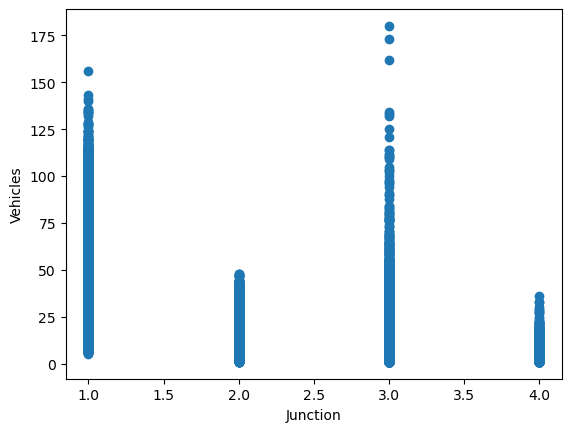

In [17]:
plt.scatter(df['Junction'],df['Vehicles'])
plt.xlabel('Junction')
plt.ylabel('Vehicles')
#graph shows that junction 3 goes to highest number of vehicles.
plt.show()

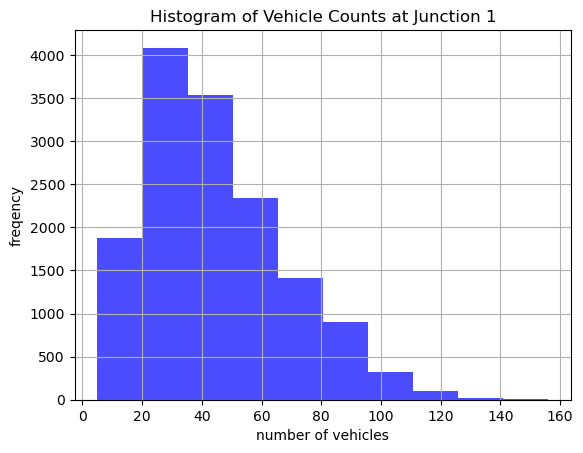

In [18]:
arr=[]
for index, row in df.iterrows():
    if row['Junction'] == 1: 
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='blue', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 1')
plt.grid(True)
#at junction 1, the number of vehicles goes till 4000 and above.
plt.show()

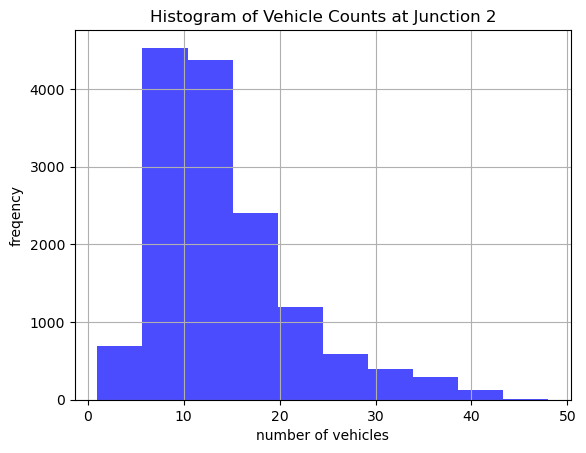

In [19]:
arr=[]
for index, row in df.iterrows():  
    if row['Junction'] == 2: 
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='blue', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 2')
plt.grid(True)
#at junction 2, the number of vehicles goes till 4500+.
plt.show()

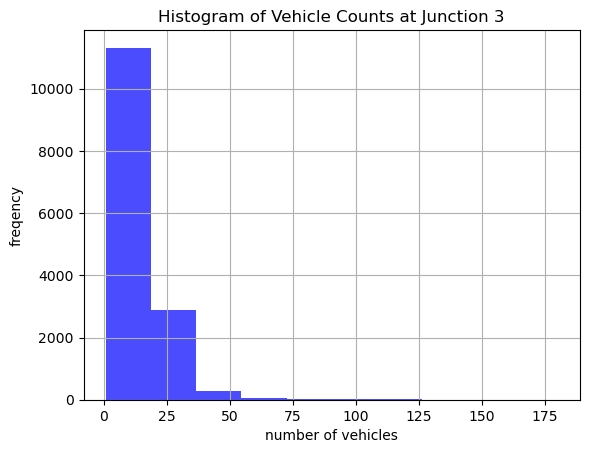

In [20]:
arr=[]
for index, row in df.iterrows(): 
    if row['Junction'] == 3:  
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='blue', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 3')
plt.grid(True)
#at junction 3, the number of vehicles goes till 10000+.
plt.show()

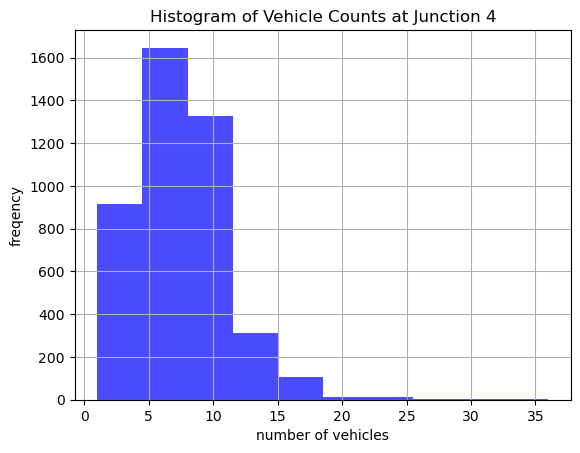

In [21]:
arr=[]
for index, row in df.iterrows():  
    if row['Junction'] == 4:  
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='blue', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 4')
plt.grid(True)
#at junction 4, the number of vehicles foes till 1600+.
plt.show()

Text(0.5, 0, 'DateTime')

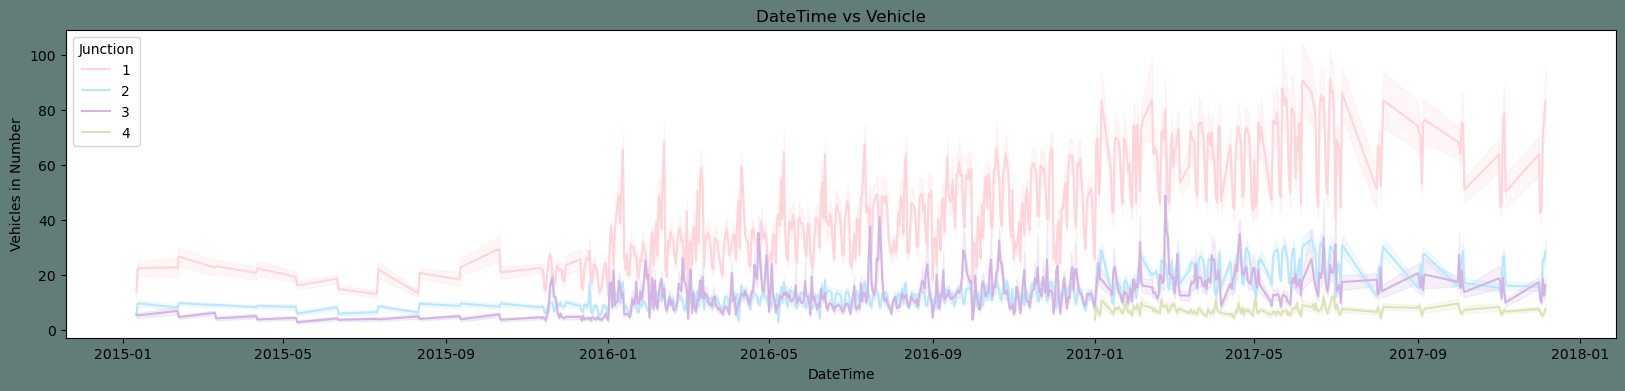

In [22]:
colors = ["#FFD4DB", "#BBE7FE", "#D3B5E5", "#dfe2b6"]
plt.figure(figsize=(20, 4), facecolor="#627D78")  
time_series = sns.lineplot(x=df['DateTime'], y="Vehicles", data=df, hue="Junction", palette=colors)  
time_series.set_title("DateTime vs Vehicle")  
time_series.set_ylabel("Vehicles in Number")  
time_series.set_xlabel("DateTime")
#accrding to time_series graph we can observe that junction 4 has lowest no. of vehicles at all time while junction1 has highest.

Text(0.5, 0, 'Date')

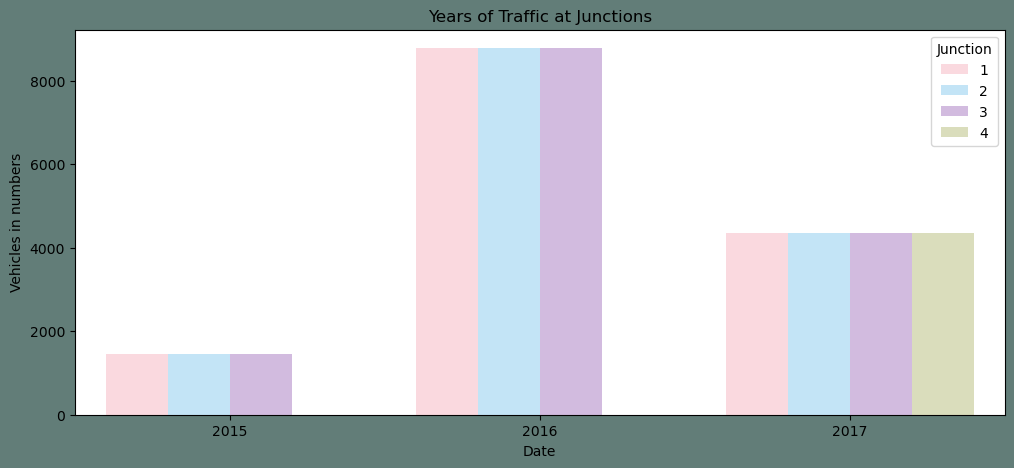

In [23]:
plt.figure(figsize=(12,5),facecolor="#627D78")  
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date") 
#from countplot one can observe that junction 4 has started in use in 2017.

C:\Users\vishv\AppData\Local\Temp\ipykernel_15108\1181701979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

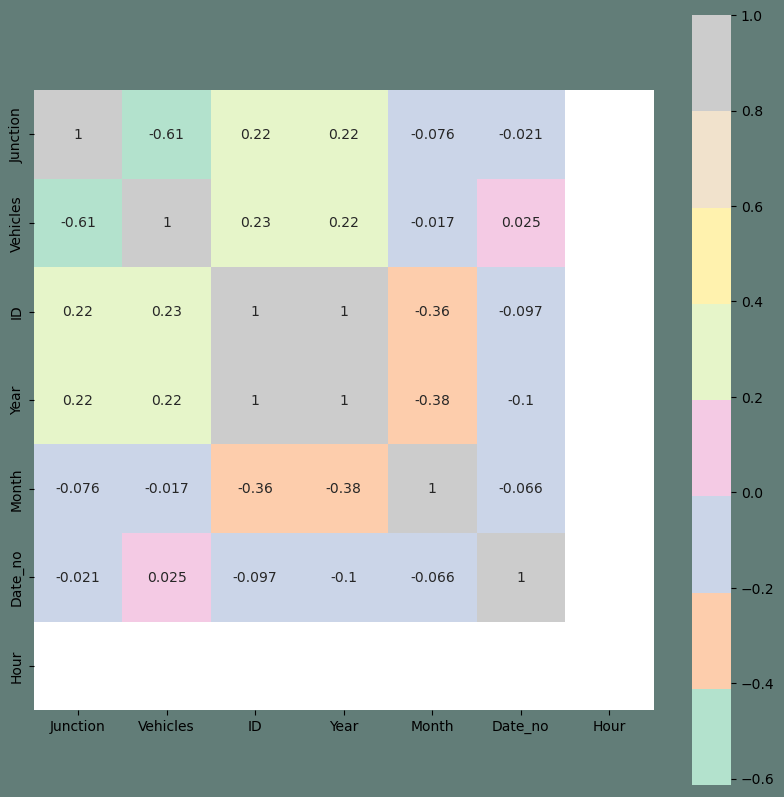

In [24]:
corrmat = df.corr()  
plt.subplots(figsize=(10,10),facecolor="#627D78")  
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, ) 
#using correlation graph we can understand the relationship of each feature with others.
#here ID and no. of vechiles are highly correlated while with junction it has negative relationship.

In [25]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-01-11,1,15,20151101001,2015,1,11,0,Sunday
1,2015-01-11,1,13,20151101011,2015,1,11,0,Sunday
2,2015-01-11,1,10,20151101021,2015,1,11,0,Sunday
3,2015-01-11,1,7,20151101031,2015,1,11,0,Sunday
4,2015-01-11,1,9,20151101041,2015,1,11,0,Sunday


In [26]:
import pandas as pd

import time


def datetounix1(df):
    #
    unixtime = []
    
    
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    
    df['DateTime'] = unixtime
    return df

# Apply datetounix1 to the DataFrame
train_features = datetounix1(df.drop(['Vehicles'], axis=1))
test_features = datetounix1(test)

# Store Features / Predictors in array :
X = train_features  
X_valid = test_features

# One Hot Encoding - Using Dummies :
X = pd.get_dummies(X)
X_valid = pd.get_dummies(X_valid)


y = df['Vehicles'].to_frame()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=512)

In [27]:
features_used = X_train.columns.tolist()
print(features_used)

['DateTime', 'Junction', 'ID', 'Year', 'Month', 'Date_no', 'Hour', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']


In [28]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()


linear_regressor.fit(X_train, y_train)


y_pred_linear = linear_regressor.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("R2 Score:", r2_linear)

Linear Regression Model Evaluation:
Mean Squared Error: 201.73482504438113
Mean Absolute Error: 10.300469987361438
R2 Score: 0.5422434446758574


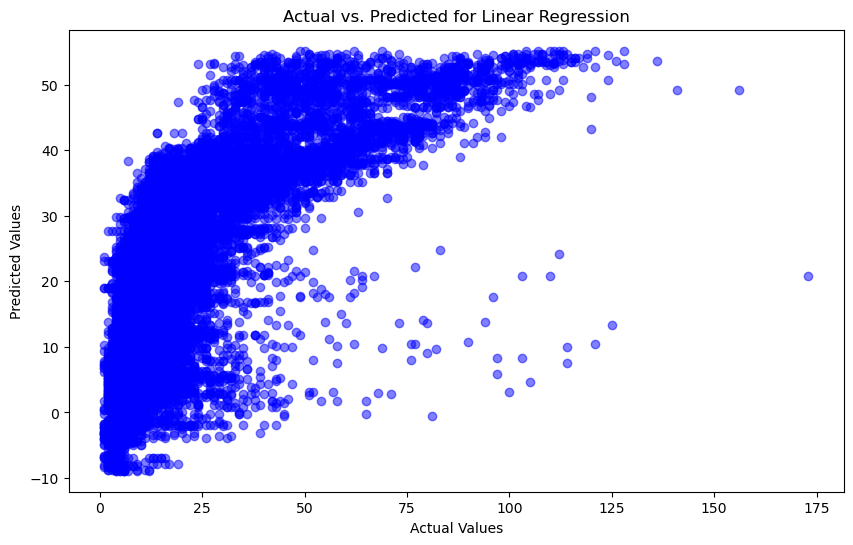

In [35]:
# Visualizing the difference between predicted and actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


train_data = lgb.Dataset(X_train, label=y_train)


params = {
    'objective': 'regression',
    'metric': 'rmse'  
}


model = lgb.train(params, train_data, num_boost_round=100)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 32240, number of used features: 13
[LightGBM] [Info] Start training from score 22.676458
Mean Squared Error: 97.07228093821986
Mean Absolute Error: 6.448586650344218
R2 Score: 0.7797332566156524


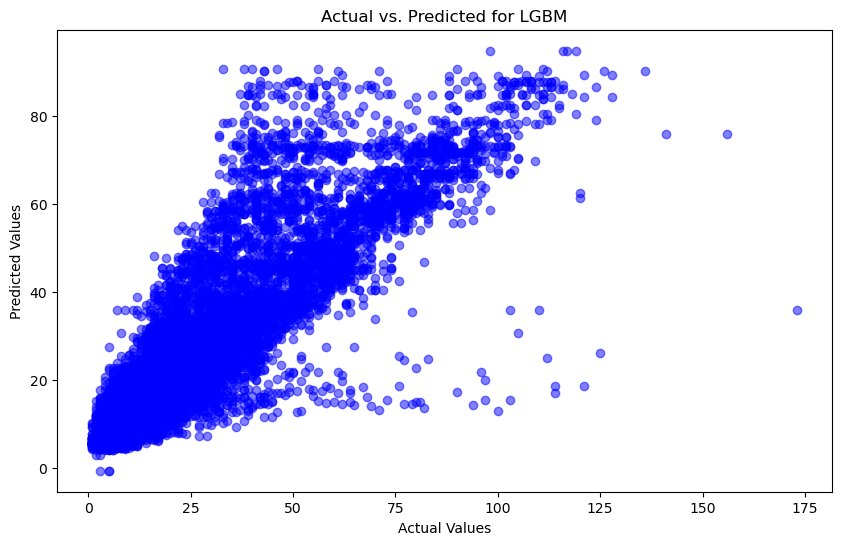

In [36]:
# Visualizing the difference between predicted and actual values for LGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted for LGBM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest regressor with 100 estimators
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


y_pred_rf = rf_regressor.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R2 Score:", r2_rf)

C:\Users\vishv\AppData\Local\Temp\ipykernel_15108\132293407.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


Random Forest Regression Model Evaluation:
Mean Squared Error: 94.98263740355833
Mean Absolute Error: 6.326203056741734
R2 Score: 0.7844748674211819


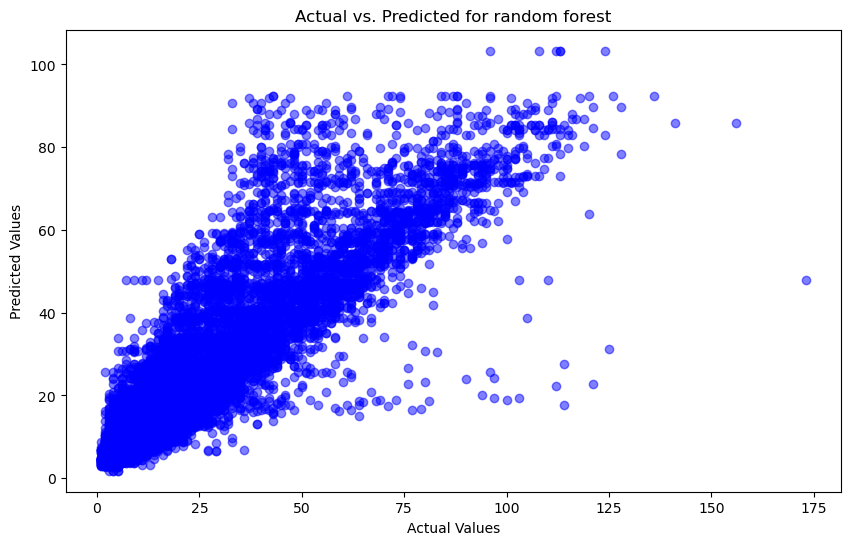

In [37]:
# Visualizing the difference between predicted and actual values for random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted for random forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()